# Homework 6: Coding

**Due Monday November 4th, 11:59pm.**

**This is an individual assignment.**

**Submit hw6.py file to Gradescope (note there is no autograder for this assignment).**

In [0]:
"""
Import libraries that you might require.
"""
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from scipy.spatial import distance
import random
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression, LogisticRegression
%matplotlib inline

# **Data Imputation**

## Importing the Data
Here we import the data and randomly set some values to np.NaN.  
You would have to replace these NaNs in later code.  
Remember to use test set to get your accuracies and do not overwrite the train sets or the miss sets.  
You would be copying to a new numpy array each time and then impute it.

In [2]:
breast = load_breast_cancer()

X = breast['data']
y = breast['target']

np.random.seed(100)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

X_train, y_train = X[:300], y[:300]
X_test, y_test = X[300:], y[300:]


def imputeData(X, y):
  random.seed(42)
  X_miss, y_miss = X.copy(), y.copy()
  for i in range(5000):
    sampleId = random.randint(0, X.shape[0] - 1)
    featureId = random.randint(0, X.shape[1] - 1)
    X_miss[sampleId][featureId] = np.NaN
  return X_miss, y_miss


X_miss, y_miss = imputeData(X_train, y_train)

print('p.shape', p.shape)
print('X_miss', X_miss)
print('y_miss', y_miss)
print('X_miss.shape', X_miss.shape)
print('y_miss.shape', y_miss.shape)

p.shape (569,)
X_miss [[1.791e+01       nan 1.244e+02 ...       nan       nan       nan]
 [1.434e+01 1.347e+01 9.251e+01 ... 1.087e-01 3.062e-01 6.072e-02]
 [2.016e+01 1.966e+01 1.311e+02 ... 1.425e-01       nan 5.933e-02]
 ...
 [      nan       nan 9.784e+01 ...       nan       nan 9.218e-02]
 [      nan 2.153e+01 9.741e+01 ... 2.701e-01       nan 1.275e-01]
 [1.442e+01       nan 9.448e+01 ...       nan       nan 9.353e-02]]
y_miss [0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1

## 3.1 Zero Imputation  
Complete the `zeroImpute` method which takes in the data with missing value and replaces the missing values with zeroes.  
Then train a logistic classifier on this imputed data.
Report the accuracy on test set (`X_test`) and Frobenius norm of difference between the imputed data (`X_Zero`) and the original data without missing values (`X_train`).

In [3]:
def zeroImpute(X_miss):
  '''
  Returns :
    X_imputed which has zeroes instead of missing values and same shape as X_miss.
  '''
  X_imputed = X_miss.copy()
  
  # TODO 3.1.1 : write code replace missing values with zeroes
  X_imputed = np.nan_to_num(X_imputed, nan=0.0)

  assert X_imputed.shape == X_miss.shape
  
  return X_imputed


X_zero = zeroImpute(X_miss)
print('Frobenius norm for zero imputation is {0}'.format(LA.norm(X_zero - X_train)))

# TODO 3.1.2 : write code to train a logistic regression classifier.
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_zero, y_miss)
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=2000).fit(X_zero, y_miss)
clf2 = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr', max_iter=2000).fit(X_zero, y_miss)
clf3 = LogisticRegression(random_state=0, solver='saga', multi_class='ovr', max_iter=2000).fit(X_zero, y_miss)
clf4 = LogisticRegression(random_state=0, solver='sag', multi_class='ovr', max_iter=2000).fit(X_zero, y_miss)
clf5 = LogisticRegression(random_state=0, solver='newton-cg', multi_class='ovr', max_iter=2000).fit(X_zero, y_miss)

print('Accuracy for zero imputation is {0}%'.format(clf.score(X_test, y_test)*100))
print('Accuracy for zero imputation2 is {0}%'.format(clf2.score(X_test, y_test)*100))
print('Accuracy for zero imputation3 is {0}%'.format(clf3.score(X_test, y_test)*100))
print('Accuracy for zero imputation4 is {0}%'.format(clf4.score(X_test, y_test)*100))
print('Accuracy for zero imputation5 is {0}%'.format(clf5.score(X_test, y_test)*100))

Frobenius norm for zero imputation is 15925.766288536064


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for zero imputation is 47.58364312267658%
Accuracy for zero imputation2 is 56.50557620817844%
Accuracy for zero imputation3 is 85.50185873605948%
Accuracy for zero imputation4 is 85.13011152416357%
Accuracy for zero imputation5 is 46.84014869888476%


## 3.2 Mean Imputation  
Complete the `meanImpute` method which takes in the data with missing value and replaces the missing values with mean for that column (ignoring the NaNs).  
Then train a logistic classifier on this imputed data.
Report the accuracy on test set (`X_test`) and Frobenius norm of difference between the imputed data (`X_mean`) and the original data without missing values (`X_train`).

In [4]:
# average test
a = np.array([[1,2],[3,4]])
aver = np.average(a, axis=0)
print(aver)
idx = np.array([[0,0], [1,0]])
print(idx[:,0])
print(a[idx[:,0], idx[:,1]])

a[idx[:,0], idx[:,1]] = 999
print(a)

[2. 3.]
[0 1]
[1 3]
[[999   2]
 [999   4]]


In [0]:
def meanImpute(X_miss):
  '''
  Returns :
    X_imputed which has mean of the corresponding column instead of the missing values and same shape as X_miss.
  '''
  X_imputed = X_miss.copy()
  
  # TODO 3.2.1 : write code to replace the value of NaNs with the mean of their column.
  X_imputed_zero = np.nan_to_num(X_imputed, nan=0.0)
  avg_col = np.nanmean(X_miss, axis=0)
  idx_imputed = np.argwhere(X_imputed_zero==0)

  X_imputed[idx_imputed[:,0], idx_imputed[:,1]] = avg_col[idx_imputed[:,1]]

  assert X_imputed.shape == X_miss.shape

  return X_imputed

In [6]:
X_mean = meanImpute(X_miss)
print('Frobenius norm for mean imputation is {0}'.format(LA.norm(X_mean - X_train)))

# TODO 3.2.2 : write code to train a logistic regression classifier.

# print('Accuracy for mean imputation is {0}%'.format(clf.score(X_test, y_test)*100))

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_mean, y_miss)
clf2 = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr').fit(X_mean, y_miss)
# clf2 = LogisticRegression(random_state=0, solver='liblinear', max_iter=10000).fit(X_mean, y_miss)
clf3 = LogisticRegression(random_state=0, solver='saga', multi_class='ovr').fit(X_mean, y_miss)
clf4 = LogisticRegression(random_state=0, solver='sag', multi_class='ovr').fit(X_mean, y_miss)
clf5 = LogisticRegression(random_state=0, solver='newton-cg', multi_class='ovr').fit(X_mean, y_miss)

print('Accuracy for zero imputation is {0}%'.format(clf.score(X_test, y_test)*100))
print('Accuracy for zero imputation2 is {0}%'.format(clf2.score(X_test, y_test)*100))
print('Accuracy for zero imputation3 is {0}%'.format(clf3.score(X_test, y_test)*100))
print('Accuracy for zero imputation4 is {0}%'.format(clf4.score(X_test, y_test)*100))
print('Accuracy for zero imputation5 is {0}%'.format(clf5.score(X_test, y_test)*100))

Frobenius norm for mean imputation is 8851.631662780634
Accuracy for zero imputation is 87.73234200743495%
Accuracy for zero imputation2 is 90.33457249070632%
Accuracy for zero imputation3 is 89.21933085501858%
Accuracy for zero imputation4 is 89.21933085501858%
Accuracy for zero imputation5 is 94.42379182156134%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## 3.3 Regression Imputation  
Complete the `regressedImpute` method which takes in the data with missing value and replaces the missing values with values predicted by a linear classifier trained on rows which do not have missing data for the given column to predict the values of given column.  
It does this by iterating through a columns and replacing the missing data (in a copy) with a different model for each feature.   

The method should also train a logistic classifer during the run and store the its accuracy on test set (`X_test`) and the Frobenius norm of difference between the imputed data (`X_imputed`) and the original data without missing values (`X_train`).  
  

Finally train a logistic classifier on the completely imputed data.
Report the accuracy on test set (`X_test`) and Frobenius norm of difference between the imputed data (`X_regressed`) and the original data without missing values (`X_train`).  

Repeat the process again with the imputed data to impute it a second time and observe the differences.

In [7]:
# test

# delete test
X_miss_cp = X_miss.copy()
y_miss_cp = y_miss.copy()
X_zero = zeroImpute(X_miss_cp)

idx = np.argwhere(X_zero==0)
idx_row = idx[:,0]
idx_row = np.unique(idx_row)

X_full = np.delete(X_zero, idx_row, 0)
print(idx_row)
print(X_zero)
print(X_zero.shape)
print(X_full.shape)

a,b = X_zero.shape
print(a, b)

# nan test
c = np.array([[np.log(-1.), 1, 4], [2, 3, np.log(-1.)]])
idx_nan = np.argwhere(np.isnan(c))
# idx_nan = np.isnan(c)
print(idx_nan)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


（1）若删除所有含nan的行（寻找数据齐全的行），则没有数据，因此先默认nan都用0替代来进行linear regression？

（2）逐列迭代， 每次循环以除此列外数据为X， 以此列数据为y（是否除去为nan/0 的y数据？）
（3）函数应加入 y_miss 作为输入？

In [0]:
def regressedImpute(X_baseImputed, X_miss, X_test, y_test, computePerFeatureStatistics = False):
  '''
  Returns :
    X_imputed which has mean of the linearly regressed value instead of the missing values and same shape as X_miss.
  if computePerFeatureStatistics is True, also:
    list of Frobenius norms of difference between reconstructions and original data (without missing values) calculated after each imputing each column.
    list of accuracies on test set of Logistic Regression classifier trained on imputed data after each imputing each column.
  '''
  X_imputed = X_baseImputed.copy()
  frobenius_norms =[]
  accuracies =[]
  # TODO 3.3.1 
  # We do a linear regression based imputation here, for each column, train a classifier to predict its value based on values of other features and
  # replace the NaN with the predicted values. 
  # IMPORTANT : You should not use regressed values from an earlier column to predict a later column, make sure to train the regression model on base imputed
  #             and not modify base imputed during the run.
  #             You can use X_miss to find which values were originally NaNs.
    
  X_imputed_cp = X_imputed.copy()
  print('X_imputed_cp.SHAPE', X_imputed_cp.shape)
  X_miss_cp = X_miss.copy()
  num_row, num_col = X_baseImputed.shape
  idx_imputed = np.argwhere(np.isnan(X_miss))

  for idx_col in range(num_col):
      # prepare train data
    #   X_partial = np.delete(X_imputed, idx_col, 1)
    #   y_partial = X_imputed[:, idx_col]
      X_partial = np.delete(X_imputed, idx_col, 1)
      y_partial = X_miss_cp[:, idx_col]
    #   delete_row = np.argwhere(y_partial==0)
      delete_row = np.argwhere(np.isnan(y_partial)==True)
      delete_row = np.squeeze(delete_row)
    #   print('DELETE ROW', delete_row)
      X_partial_train = np.delete(X_partial, delete_row, 0)
      y_partial_train = np.delete(y_partial, delete_row, 0)

    #   print('X_partial.shape', X_partial.shape)
    #   print('y_partial.shape', y_partial.shape)
    #   print('X_partial_train.shape', X_partial_train.shape)
    #   print('y_partial_train.shape', y_partial_train.shape)
    #   print('delete_row.shape', delete_row.shape)
    #   print('delete_row', delete_row)

      # train model on other columns
    #   regr = sklearn.linear_model.ElasticNet(random_state=0).fit(X_partial_train, y_partial_train)
    #   print('y_partial_train', y_partial_train)
    #   print(X_partial_train)
      regr = sklearn.linear_model.LinearRegression().fit(X_partial_train, y_partial_train)

      # predict impute value and plug them back
      X_toimpute = X_partial[delete_row, :]
    #   print('X_toimpute.shape', X_toimpute.shape)
    #   print(X_toimpute)
    #   print('delete_row', delete_row)
      X_imputed_cp[delete_row, idx_col] = regr.predict(X_toimpute)
    #   print("PREDICTED", regr.predict(X_toimpute))


      if computePerFeatureStatistics == True:
          # TODO 3.3.2
          # calculate list of Frobenius norms
          X_diff = X_imputed_cp - X_train
          F_norm = np.linalg.norm(X_diff)
          frobenius_norms.append(F_norm)

          # calculate list of accuracies
          clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_imputed_cp, y_train)
          acc = clf.score(X_test, y_test)*100
          accuracies.append(acc)
    #   print('IMPUTED', X_imputed_cp)

  X_imputed = X_imputed_cp

  if computePerFeatureStatistics == True:
    return X_imputed, frobenius_norms, accuracies
  else:
    return X_imputed


X_imputed_cp.SHAPE (300, 30)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

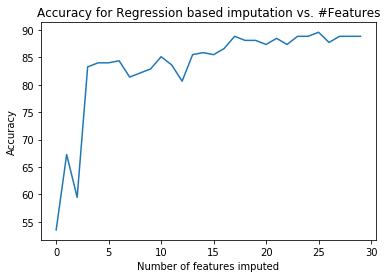

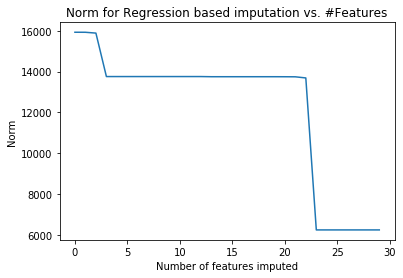

Frobenius norm and accuracy for regression based imputation after base imputation are 15925.766288536064 and 46.84014869888476%
X_imputed_cp.SHAPE (300, 30)
Frobenius norm for regress imputation is 6240.44789920822
Accuracy for regress imputation is 84.66666666666667%
X_imputed_cp.SHAPE (300, 30)
Frobenius norm for regress imputation is 4077.936079003124
Accuracy for regress imputation is 87.66666666666667%
X_imputed_cp.SHAPE (300, 30)
Frobenius norm for regress imputation is 3583.016052473237
Accuracy for regress imputation is 87.0%
X_imputed_cp.SHAPE (300, 30)
Frobenius norm for regress imputation is 3023.485833477984
Accuracy for regress imputation is 89.66666666666666%
X_imputed_cp.SHAPE (300, 30)
Frobenius norm for regress imputation is 3122.4011069371054
Accuracy for regress imputation is 89.33333333333333%


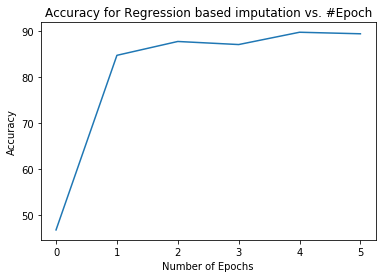

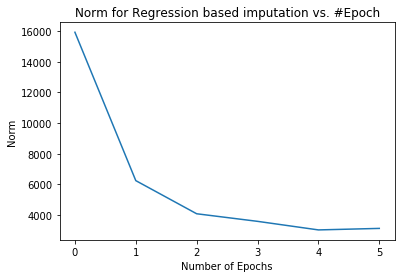

In [9]:
import sklearn

norms =[]
accuracies = []
X_regressed = zeroImpute(X_miss)
X_regressed, norms, accuracies = regressedImpute(X_regressed, X_miss, X_test, y_test, True)
plt.plot(accuracies)
plt.title("Accuracy for Regression based imputation vs. #Features")
plt.ylabel('Accuracy')
plt.xlabel('Number of features imputed')
plt.show()
plt.plot(norms)
plt.title("Norm for Regression based imputation vs. #Features")
plt.ylabel('Norm')
plt.xlabel('Number of features imputed')
plt.show()


epochs = 5
norms =[]
accuracies = []

# TODO 3.3.3  : write code to impute dataset with zeros initially, then train a logistic regression classifier and 
#   store the norm of difference between the imputed data and the original data without missing values and the accuracy 
#   of the classifier on the test set in appropriate variables.
X_regressed = zeroImpute(X_miss)
norm = LA.norm(X_regressed - X_train)

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter=100000).fit(X_regressed, y_train)
accuracy = clf.score(X_test, y_test)*100

norms.append(norm)
accuracies.append(accuracy)
print('Frobenius norm and accuracy for regression based imputation after base imputation are {0} and {1}%'.format(norm,accuracy))


# Here we show how repeated imputation using regression affect our dataset. For each epoch re-impute the data from previous
# epoch.
for i in range(epochs):

  # TODO 3.3.4 : Same as 3.3.3 but this time impute the data with the regression method you completed.
  X_regressed = regressedImpute(X_regressed, X_miss, X_test, y_test, False) 
  print('Frobenius norm for regress imputation is {0}'.format(LA.norm(X_regressed - X_train)))
  norms.append(LA.norm(X_regressed - X_train))

  clf = LogisticRegression(random_state=0, solver='saga', multi_class='ovr', max_iter=100000).fit(X_regressed, y_train)

  print('Accuracy for regress imputation is {0}%'.format(clf.score(X_regressed, y_train)*100))
  accuracies.append(clf.score(X_regressed, y_train)*100)

#   norms.append(norm)
#   accuracies.append(accuracy)
#   print('Frobenius norm and accuracy for regression based imputation for step number {0} are {1} and {2}%'.format(i + 1, norm,accuracy))
  
plt.plot(accuracies)
plt.title("Accuracy for Regression based imputation vs. #Epoch")
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
plt.plot(norms)
plt.title("Norm for Regression based imputation vs. #Epoch")
plt.ylabel('Norm')
plt.xlabel('Number of Epochs')
plt.show()

## Question 4: K-means

We will implement the k-means clustering algorithm using the Breast Cancer dataset. As with all unsupervised learning problems, our goal is to discover and describe some hidden structure in unlabeled data. The K-means algorithm, in particular, attempts to determine how to separate the data into <em>k</em> distinct groups over a set of features ***given that there are k groups***.

Knowing there are <em>k</em> distinct 'classes' however, doesn't tell anything about the content/properties within each class. If we could find samples that were representative of each of the *k* groups, then we could label the rest of the data based on how similar they are to each of the prototypical samples. Armed with this intuition, we can better understand the iterative k-means clustering process which will be used to find these representative samples (prototypes).

We can define such prototypes using the following metrics:
- centroid – the average of similar points w.r.t. continuous features (e.g. petal lengths in the iris dataset)
- medioid – the most representative/most frequently occurring point w.r.t. categorical features (e.g. discrete color labels, blue vs. red vs. green.)

### Import the Data ###

In [0]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.spatial import distance
import random

In [0]:
# Read data (Breast Cancer Dataset). Remember to comment out the code not contained in a function.
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()

X = breast['data']
y = breast['target']

np.random.seed(100)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

X_train, y_train = X[:400], y[:400]
X_val, y_val = X[400:500], y[400:500]
X_test, y_test = X[500:], y[500:]

### K-means algorithm

To implement K-means, we divided the algorithm into two functions: a helper method **kmeans_iter()** to update the centroid values and clusters at each interval, and **kmeans()** to run the helper function<br>  
<br>
The K-means process you should follow is listed below:
1. Initialize each centroid to a random datapoint
2. Update each node's cluster to that whose *centroid* is closest
3. Calculate the new *centroid* of each cluster
4. Repeat the previous 2 steps until no centroid value changes


*Hint: you can use the `distance.euclidean(a, b)`   function from scipy to calculate the euclidean distances between lists.*

If the **kmeans_iter()** function returns less than k centroids, let the updated centroid value of the empty cluster be the same as it was at the beginning of the iteration.

### 4.1 `kmeans_iter` function



In [12]:
# test
a = [0] * 5
print(a)

[0, 0, 0, 0, 0]


In [0]:
def kmeans_iter(X, centroids):
    """
    Performs one iteration of the k-means clustering algorithm.
    
    INPUT:
      X - m by n matrix, where m is the number of training points
      centroids - a list of the centroid values
    
    OUTPUT:
      clusters - an updated list of the list of indices in X for each cluster 
      updated_centroids - an updated list of the new centroid values
    """
    
    clusters = [0] * len(X)
    # print('X[0]', X[0])
    updated_centroids = [[0 for _ in range(len(X[0]))] for _ in range(len(centroids))]
    # print('updated_centroids', updated_centroids)
    n_in_cluster = [0] * len(centroids)
   
    # TODO 4.1.1 your code here

    # change to np array
    X_ary = np.asarray(X).astype(float)
    centroids_ary = np.asarray(centroids).astype(float)

    clusters_ary = np.asarray(clusters).astype(float)
    updated_centroids_ary = np.asarray(updated_centroids).astype(float)
    n_in_cluster_ary = np.asarray(n_in_cluster).astype(float)
    # print('X[0]-centroids[0]', X_ary[0]-centroids_ary[0])

    # update clusters (E step)
    num_class = centroids_ary.shape[0]
    # print('num_class', num_class)
    norm = np.empty([X_ary.shape[0], 1])
    for i in range(num_class):
        norm_i = np.linalg.norm(X_ary-centroids_ary[i], ord=2, axis=1)
        norm_i = norm_i[:, np.newaxis]
        # norm = np.concatenate((norm, norm_i), axis=1)
        if i==0:
            norm = norm_i
        else:
            norm = np.concatenate((norm, norm_i), axis=1)
    # print('norm', norm)
    clusters_ary = np.argmin(norm, axis=-1)
    # print('clusters_ary', clusters_ary)

    # update centroids (M step)
    for i in range(num_class):
        idx_class_i = np.argwhere(clusters_ary==i).squeeze()
        # print('idx_class_i', idx_class_i)
        class_i = X_ary[idx_class_i]
        # print('class_i', class_i)
        if class_i.size:
            # print('NOT EMPTY')
            updated_centroids_ary[i, :] = np.average(class_i, axis=0)
            # print('updated_centroids_ary[i, :]', updated_centroids_ary[i, :])
        else:
            updated_centroids_ary[i, :] = centroids_ary[i]
            # print('EMPTY')
            # print('updated_centroids_ary[i, :]', updated_centroids_ary[i, :])
        
    # print('centroids_ary', centroids_ary)
    # print('updated_centroids_ary', updated_centroids_ary)
    clusters = np.ndarray.tolist(clusters_ary)
    updated_centroids = np.ndarray.tolist(updated_centroids_ary)
    return (clusters, updated_centroids)
    # return (clusters_ary, updated_centroids_ary)
    

In [14]:
### 4.1.1: check kmeans_iter and paste your results into your Latex document.

X1 = [[1], [2], [10], [12]]
# print('X1[0]', X1[0])

init1 = [1,2]
init2 = [1,8]
init3 = [2,2]

X2 = [[0,5,0],[0,5,0],[0,4,3],[0,3,4]]

init4 = [[2.5,0,0],[-2.5,0,0]]

print(kmeans_iter(X1, init1))
print(kmeans_iter(X1, init2))
print(kmeans_iter(X1, init3))
print(kmeans_iter(X2, init4))

([0, 1, 1, 1], [[1.0], [8.0]])
([0, 0, 1, 1], [[1.5], [11.0]])
([0, 0, 0, 0], [[6.25], [2.0]])
([0, 0, 0, 0], [[0.0, 4.25, 1.75], [-2.5, 0.0, 0.0]])


#### Question 4.1.2

If an iteration of the k-means algorithm returns less than K classes, what might that indicate about the data? Write your response in your Latex document.

### 4.2 Putting the algorithm together

In [15]:
# test

prev_centroids = None  
a = np.asarray(prev_centroids).astype(float)

print(a)

# [1,2] != [1,2]
print([1,2] != [1,2])
print((np.asarray([1,2]) - np.asarray([1,2])).any())

nan
False
False


In [0]:
def kmeans(X, k):
    """
    Performs k-means clustering by calling kmeans_iter until no centroid value changes.
    
    INPUT:
      X - m by n matrix, where m is the number of training points
      k - the number of clusters

    OUTPUT:
      clusters - a list of the list of indices in X for each cluster 
      centroids - a list of the centroid values for each cluster
      iters - the number of iterations it took for k-means to converge
    """
    
    # Do not change random seed for consistency of plots when grading
    random.seed(520)
    centroid_init = random.sample(range(0,len(X)), k)
    centroids = [X[centroid_init[i]] for i in range(k)] 
    prev_centroids = None    
    iters = 0
    
    # TODO 4.1 your code here

    # # from list to np array
    # X_ary = np.asarray(X).astype(float)
    # centroids_ary = np.asarray(centroids).astype(float)
    # prev_centroids_ary = np.asarray(prev_centroids).astype(float)

    # (clusters, updated_centroids) = kmeans_iter(X, centroids)

    # print(centroids != prev_centroids)

    # while (np.asarray(centroids) - np.asarray(prev_centroids)).any():
    # while np.any(np.asarray(centroids) - np.asarray(prev_centroids)):
    # while (centroids != prev_centroids):
    while True:
        (clusters, updated_centroids) = kmeans_iter(X, centroids)
        prev_centroids = centroids
        centroids = updated_centroids
        iters += 1
        if (np.all(np.asarray(centroids) == np.asarray(prev_centroids))):
            break;

        
    return (clusters, centroids, iters)

#### 4.2.1 Sanity Check
Run the code below to make sure your kmeans function is partitioning the data correctly. The points are projected into two demensions using the first 2 PCA components. You should see a clear split between your clusters. Submit these graphs in your writeup under section 4.2.1.

9


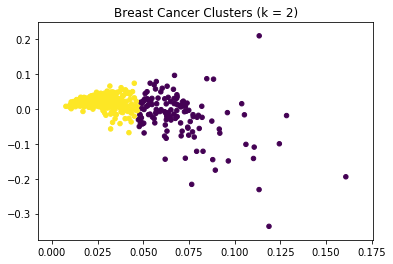

23


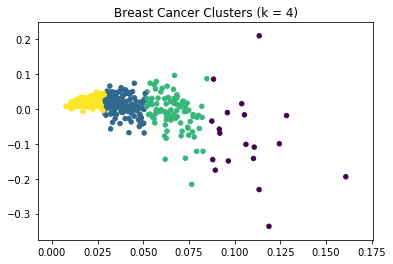

20


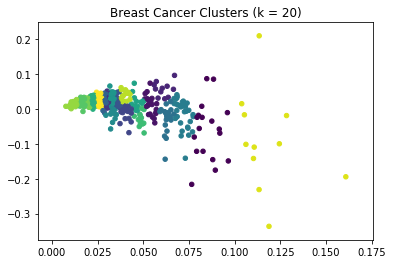

In [17]:
pca = PCA(n_components = 2)
v = pca.fit(np.transpose(X)).components_

for k in [2,4,20]:
    (clusters, centroids, iters) = kmeans(X,k)
    print(iters)
    plt.scatter(v[0], v[1], c=clusters, s= 20)
    plt.title("Breast Cancer Clusters (k = "+str(k) + ")")
    plt.show()

#### Question 4.2.2

Write down how many iterations it took for your kmeans to converge for each of the sanity-check graphs. How does this number compare with what you expected it to be? How does the number of iterations seem to vary proportional to k?

## 4.3 Choosing a Value for K

Now that we can separate our data into K groups, we just need to figure out the best value for K (how many clusters our data really consists of).

## Testing Cluster Distortion 

One way to decide on a value for K is to run K-Means and plot the distortion (sum of squared error given Euclidean distance). From that we can find the "elbow of the graph;" indicating the best tradeoff between number of clusters and distortion.

In the function **test_cluster_size**,  iterate over possible cluster sizes from 2 to a *max_cluster* (inclusive) value. For each *k*, run K-means and calculate its distortion.

In [0]:
def test_cluster_size(X, max_k):
    """
    Iterates over possible cluster from 2 to max_k, running k-means and calulating distortion.
    
    INPUT:
      X - m by n matrix, where m is the number of training points
      max_k - the maximum number of clusters to consider
    
    OUTPUT:
      scores - a list of scores, where score[i] is the distortion for k-means with i clusters
    """
    scores = [0] * (max_k-1)
    # print('scores', scores)
    
    # TODO 4.3 your code here
    X_ary = np.asarray(X).astype(float)

    for k in range(2, max_k+1):
        (clusters, centroids, iters) = kmeans(X,k)

        
        clusters_ary = np.asarray(clusters).astype(float)
        centroids_ary = np.asarray(centroids).astype(float)
        # print('X.shape', X.shape)
        # print('clusters_ary.shape', clusters_ary.shape)
        # print('centroids_ary.shape', centroids_ary.shape)

        num_class = centroids_ary.shape[0]
        
        distortion = 0
        for i in range(num_class):
            idx_class = np.argwhere(clusters_ary==i).squeeze()
            X_inclass = X_ary[idx_class]
            # print('idx_class.shape', idx_class.shape)
            # print('X_inclass.shape', X_inclass.shape)
            distortion_i = np.sum(np.linalg.norm(X_inclass-centroids_ary[i], ord=2, axis=1)**2)
            # print('distortion_i', distortion_i)
            distortion += distortion_i

        # print('k', k, 'distortion', distortion)
        scores[k-2] = distortion

    
    return scores

### Distortion Plot
Run the code below to plot the distortion as *k* increases from (2 to 25). Record your graph in your writeup along with the value of K you would choose.

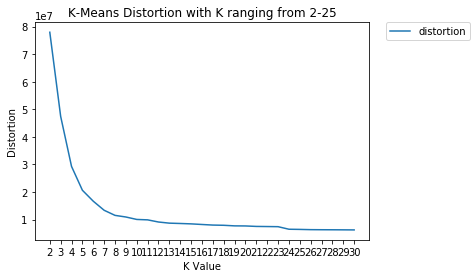

In [19]:
max_k = 30  # roig:25

scores = test_cluster_size(X, max_k)
# print('scores', len(scores))
# print('scores', scores)

plt.plot(range(max_k-1), scores, label='distortion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('K-Means Distortion with K ranging from 2-25')
plt.ylabel('Distortion')
plt.xlabel('K Value')
plt.xticks(range(max_k-1), range(2,max_k+1))
plt.show()

### Feature Scaling Using min-max
Given an input matrix X, we can rescale each feature along its min/max value range, as follows:

In [0]:
X_copy = X.copy()
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_copy)

Now plot the distortion as *k* increases from (2 to 25). Record your graph in your writeup along with the value of K you would choose

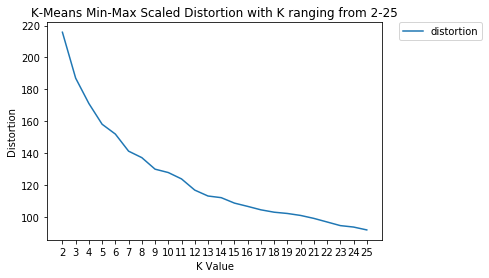

In [21]:
max_k = 25
scores = test_cluster_size(X_scaled, max_k)

plt.plot(range(max_k-1), scores, label='distortion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('K-Means Min-Max Scaled Distortion with K ranging from 2-25')
plt.ylabel('Distortion')
plt.xlabel('K Value')
plt.xticks(range(max_k-1), range(2,max_k+1))
plt.show()

### Log Scaling
As an alternative,  try adding 1 to all elements in the original matrix and then take the numpy log of all elements in the original matrix. This is the NLP-inspired version, since word frequencies are informative but follow a Zipfian distribution. Call this matrix X_log.

Again, plot the number of clusters (from 2 to 25) vs distortion. Find the “elbow” after which the change in distortion tapers off notably.

In [22]:
a = np.array([[np.e,np.e**2], [np.e**3,np.e**7]])
b = np.log(a)
print(b)

[[1. 2.]
 [3. 7.]]


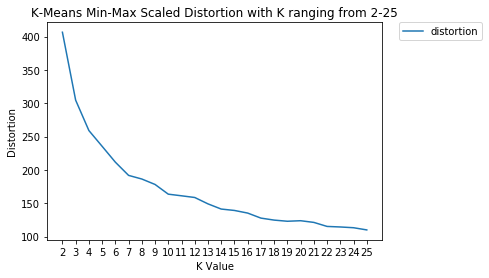

In [23]:
def logarithmize(x):
    # TODO 
    x = x+1
    x = np.log(x)
    return x

logarithmize_v=np.vectorize(logarithmize)
X_copy2 = X.copy()
X_log=logarithmize_v(X_copy2)

max_k = 25
scores = test_cluster_size(X_log, max_k)

plt.plot(range(max_k-1), scores, label='distortion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('K-Means Min-Max Scaled Distortion with K ranging from 2-25')
plt.ylabel('Distortion')
plt.xlabel('K Value')
plt.xticks(range(max_k-1), range(2,max_k+1))
plt.show()

### 4.4 The Variance Ratio Criterion

Another distortion metric called the Variance Ratio Criterion (VRC) is given by
$$ VRC(K) = \frac{SS_B}{k-1} / \frac{SS_W}{N-k}$$
where SS<sub>B</sub> is the sum of squared distance between the cluster centers and the overall sample mean (calculated per data point), *k* is the number of clusters, SS<sub>W</sub> is the sum of square distance between data points and their assigned cluster centers, and N is the number of data points.

Write the function **test_vrc** that computes the VRC on clusterings of size 2 up to size max_k. Note that SS<sub>W</sub> is the distortion metric.

In [0]:
def test_vrc(X, max_k):
    """
    INPUT:
      X - m by n matrix, where m is the number of training points
      max_k - the maximum number of clusters to consider
    
    OUTPUT:
      scores - a list of scores, where score[i] is VRC(i) 
    """
    scores = [0] * (max_k-1)
    overall_mean=np.mean(X,axis=0)
    
    # TODO 4.4 your code here
    X_ary = np.asarray(X).astype(float)
    X_mean_arg = np.average(X_ary, axis=0)
    num_data = X_ary.shape[0]
    # print('X.shape', X.shape)
    # print('X_mean_arg.shape', X_mean_arg.shape)

    for k in range(2, max_k+1):
        (clusters, centroids, iters) = kmeans(X,k)

        
        clusters_ary = np.asarray(clusters).astype(float)
        centroids_ary = np.asarray(centroids).astype(float)
        
        # print('clusters_ary.shape', clusters_ary.shape)
        # print('centroids_ary.shape', centroids_ary.shape)
        
        SSB = 0
        SSW = 0
        
        for i in range(k):
            idx_class = np.argwhere(clusters_ary==i).squeeze()
            X_inclass = X_ary[idx_class]
            # print('idx_class.shape', idx_class.shape)
            # print('X_inclass.shape', X_inclass.shape)
            # distortion_i = np.sum(np.linalg.norm(X_inclass-centroids_ary[i], ord=2, axis=1)**2)

            SSB_i = np.sum(np.linalg.norm(centroids_ary[i]-X_mean_arg, ord=2, axis=0)**2)
            SSB += SSB_i
            SSW_i = np.sum(np.linalg.norm(X_inclass-centroids_ary[i], ord=2, axis=1)**2)
            SSW += SSW_i

            # print('distortion_i', distortion_i)
            # distortion += distortion_i

        # print('k', k, 'distortion', distortion)

        VRC = (SSB*(num_data-k)) / (SSW*(k-1))
        scores[k-2] = VRC

    return scores

#### 4.4.1 VRC Plot
Using the original version of your data, (**so not the scaled or log**), run the code below to plot VRC(k) as *k* increases from (2 to 25). Record your graph in your writeup along with the value of K you would choose. For the VRC plot, you no longer looking for an elbow, but instead looking for the **first local maximum.** 

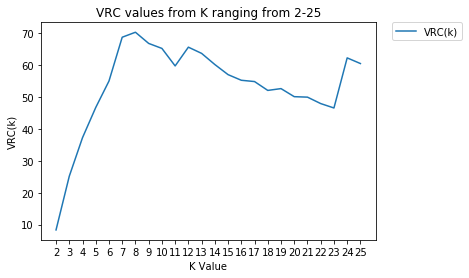

In [25]:
max_k = 25

scores = test_vrc(X, max_k)

plt.plot(range(max_k-1), scores, label='VRC(k)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('VRC values from K ranging from 2-25')
plt.ylabel('VRC(k)')
plt.xlabel('K Value')
plt.xticks(range(max_k-1), range(2,max_k+1))
plt.show()


# Turning it in

**This notebook will not be autograded, so no need to comment out code outside of functions.**

1. Download this notebook as a `hw6.py` file with the functions implemented and the sandbox code commented out
  - go to "File -> Download .py"
  
2. Submit `hw6.py` file to Gradescope (you can do this as many times as you'd like before the deadline)